# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [38]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Explore and Validate the Data
The dataset comprises **947** rows and **8** columns. Each variable has undergone validation, with necessary modifications implemented:

The column **recipe** was removed from our data.

Due to the skewed nature of the data with outliers, the median was chosen as a better imputation option than the mean; so, missing values were filled with the **median** for the following columns: _[calories, carbohydrate, sugar, protein]_

The texts in the **servings** column, specifically '_4 as a snack_' and '_6 as a snack_', were removed, and the data type was subsequently changed to numeric.

The text "Chicken Breast" in **category** column is replaced with "Chicken".

The target column **high_traffic** has been sanitized, replacing all NaN entries with '_Low_'. Below is a recapitulation of the measures applied to each variable:

- **Recipe**: This identifier is unique for each recipe and has no missing values. It requires no cleaning but will be excluded from our model as it is irrelevant for prediction purposes.
- **Calories**: This numeric field has 52 missing entries, which will be imputed with the median value.
- **Carbohydrate**: Also numeric, this field has 52 missing entries, to be filled with the median.
- **Sugar**: With 52 missing numeric values, these will be replaced by the median.
- **Protein**: This numeric field has 52 missing entries, which will be filled with the median.
- **Category**: Initially comprising 11 categorical values and no missing entries, it requires one cleaning to match the description, the "Chicken Breast" will be replaced with "Chicken".
- **Servings**: Initially containing 6 categorical values with no missing entries, it will be cleaned to include only 4 numeric values, with '4 as a snack' and '6 as a snack' converted to '4' and '6', respectively.
- **High_traffic**: This category has one value with 373 missing entries, which will be uniformly assigned to the "Low" category.



In [39]:
# Data loading and displaying the first few elements
data = pd.read_csv('recipe_site_traffic_2212.csv')
data.head(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [40]:
# Exploring the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [41]:
# The percentage of missing data by columns
print("% of missing values by column \n\n" + str(round(data.isna().mean() * 100, 2)))

% of missing values by column 

recipe           0.00
calories         5.49
carbohydrate     5.49
sugar            5.49
protein          5.49
category         0.00
servings         0.00
high_traffic    39.39
dtype: float64


In the **high_traffic** target column, a significant percentage of values are missing; however, these are not truly missing values but rather represent cases with no high traffic. Therefore, we will label all such instances as **Low**.

In [42]:
# Description of the Numerical data
data.select_dtypes(include=['int64', 'float64']).describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [43]:
# Displaying the count of unique values in numerical columns
data.select_dtypes(include=['int64', 'float64']).nunique()

recipe          947
calories        891
carbohydrate    835
sugar           666
protein         772
dtype: int64

In [44]:
# Description of the Categorical data
data.select_dtypes(include=['object']).describe()

,category,servings,high_traffic
count,947,947,574
unique,11,6,1
top,Breakfast,4,High
freq,106,389,574


The data type of the **servings** column is currently categorical, which is incorrect. It will be converted to numeric.

The **category** column contains 11 categories but it will be modified to only include 10 categories as per the description

In [45]:
# Displaying unique elements in categorical columns
for c in data.select_dtypes(include=['object']):
    print("The \'" + c + "\' column contains:")
    print([i for i in data[c].unique()])
    print('\n')

The 'category' column contains:
['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat', 'Dessert']


The 'servings' column contains:
['6', '4', '1', '2', '4 as a snack', '6 as a snack']


The 'high_traffic' column contains:
['High', nan]




The rows containing the data **'4 as a snack'** and **'6 as a snack'** will be cleaned by removing the text, leaving only the numeric value.

The rows containg the data '**Chicken Breast**' will be replaced with '**Chicken**'.

#  2. Data Cleansing and Preparation for Analysis

- We remove the 'recipe' column from the dataset to streamline the features for analysis.
- We fill Numeric columns' (calories, carbohydrate, sugar, protein) missing values with their respective median values to address data gaps.
- Finally, we perform data imputation by replacing missing values in the 'high_traffic' column with 'Low', and then we clean the 'servings' column and convert it to a numeric type, last we replace Chicken Breast' with 'Chicken' in the category column, all these steps are crucial for consistency and analysis readiness.

In [46]:
# Make a copy of the data for the preparation
data_prep = data.copy()

In [47]:
# Dropping the recipe column
data_prep.drop(['recipe'], axis=1, inplace=True)

In [48]:
# Calculating the mean for each numeric column
data_prep[['calories', 'carbohydrate', 'sugar', 'protein']].median()

calories        288.55
carbohydrate     21.48
sugar             4.55
protein          10.80
dtype: float64

In [49]:
# Filling the missing values for each column with its median 
data_prep['calories'].fillna(value=data['calories'].median(), inplace=True)
data_prep['carbohydrate'].fillna(value=data['carbohydrate'].median(), inplace=True)
data_prep['sugar'].fillna(value=data['sugar'].median(), inplace=True)
data_prep['protein'].fillna(value=data['protein'].median(), inplace=True)

In [50]:
# Converting NaN values in high_traffic (the target column) into "Low"
data_prep['high_traffic'].fillna(value='Low', inplace=True)

In [51]:
# Cleaning servings column
data_prep['servings'] = data_prep['servings'].apply(lambda x: x.replace('4 as a snack', '4'))
data_prep['servings'] = data_prep['servings'].apply(lambda x: x.replace('6 as a snack', '6'))

# converting servings column to numeric
data_prep['servings'] = data_prep['servings'].astype('int')

In [52]:
# Cleaning category column: renaming Chicken Breast to Chicken 
data_prep['category'] = data_prep['category'].apply(lambda x: x.replace('Chicken Breast', 'Chicken'))

In [53]:
# Check for missing values after cleaning
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      947 non-null    float64
 1   carbohydrate  947 non-null    float64
 2   sugar         947 non-null    float64
 3   protein       947 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


# 3. Visualize, Analyse, and Understand the Data.

The visualizations provide a comprehensive overview of the relationships and distributions of various nutritional variables and recipe categories:

- The **pair plot** reveals that all four variables (calories, carbohydrate, sugar, protein) are right-skewed, with most values concentrated at the lower end. 
- **Scatter plots** show positive but weak correlations between these variables, indicating significant variability. 
- The **heatmap** further confirms these weak linear relationships, with correlation values close to zero, suggesting minimal linear dependencies among the variables. 
- The **violin plot** of servings shows a multimodal distribution with peaks around 1, 2, 4, and 6 and a median serving value around 4, indicating distinct groups within the data. 
- The **count plot** highlights that "Chicken" is the most frequent recipe category, while the other categories having relatively even distribution.

- The **histograms before transformation** show highly right-skewed distributions for calories, carbohydrates, sugar, and protein, with most data points at lower values. 
- **After applying the Yeo-Johnson transformation**, these distributions become symmetrical and bell-shaped, making the data more suitable for statistical analysis. 

Overall, the visualizations illustrate that the raw data is heavily skewed and clustered at lower values, but the transformation normalizes these distributions, enhancing the analysis potential and revealing underlying patterns in the dataset.


In [54]:
# Make a copy of the data for visualization:
data_visul = data_prep.copy()

#### The histograms before applying transformation to the data

[Text(0.5, 1.0, 'The Distribution of protein')]

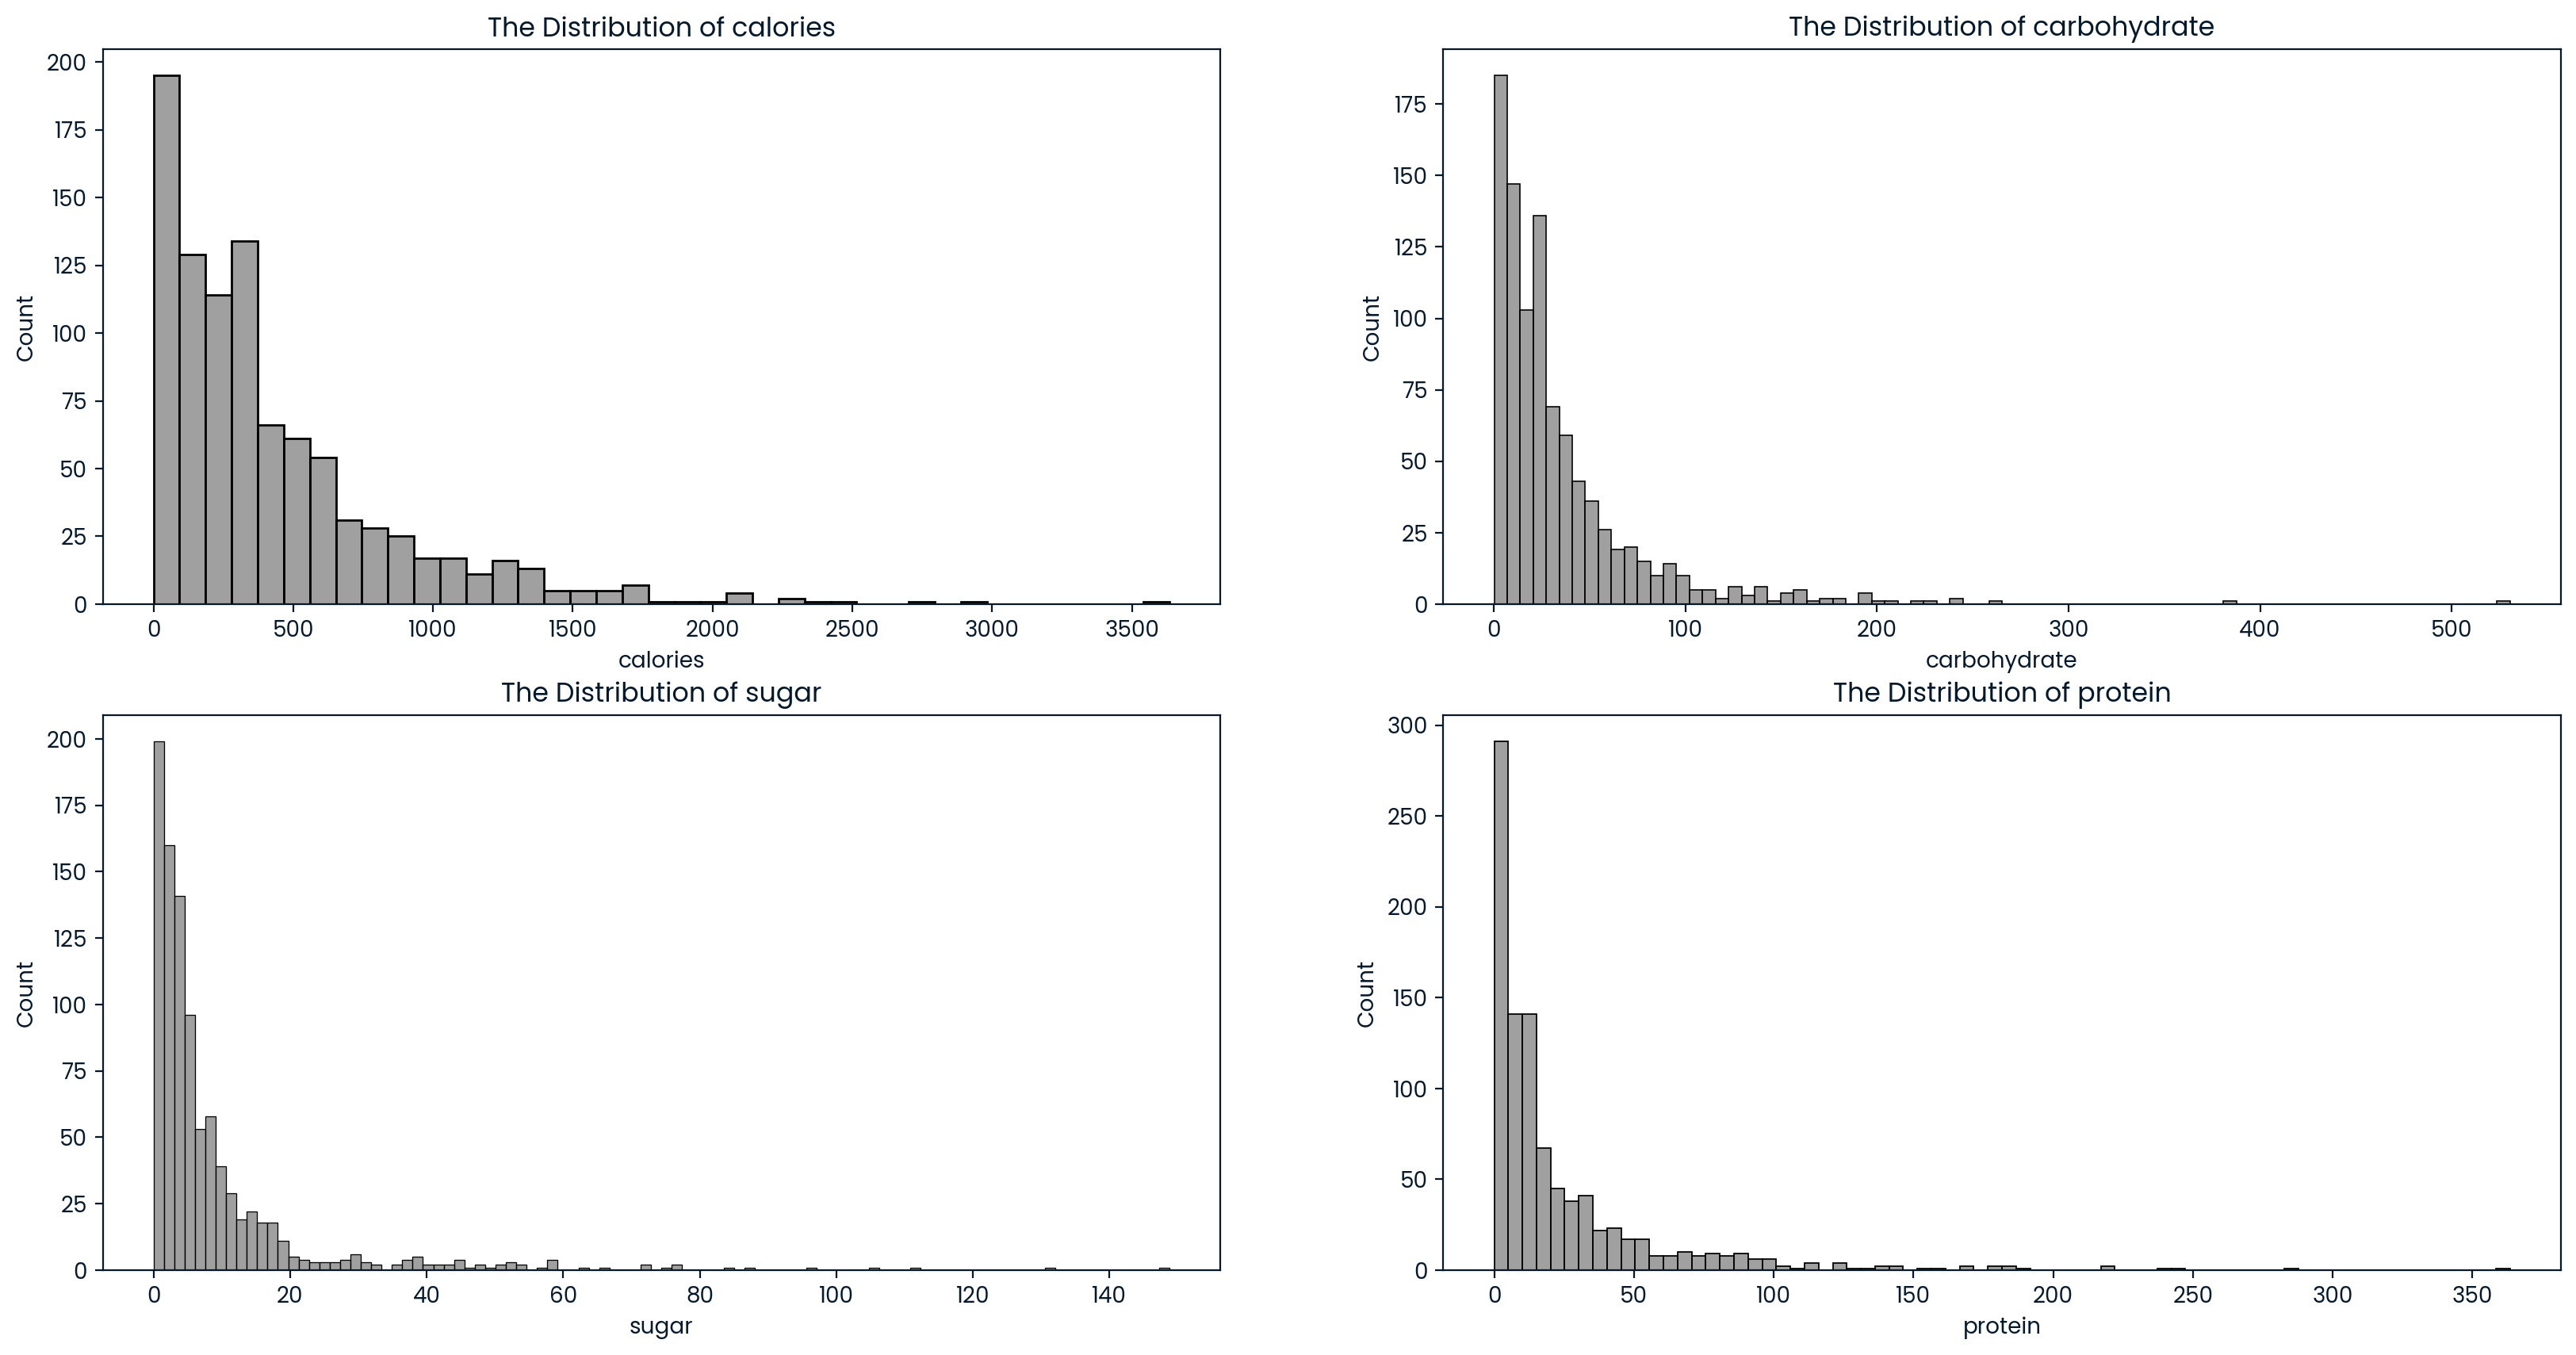

In [55]:
# We create four sub plot figures
fig, axes = plt.subplots(2,2,figsize=(20,10))

# We plot the histogram for the main numerical features
sns.histplot(data_visul['calories'], color='gray', ax=axes[0, 0]).set(title='The Distribution of calories')
sns.histplot(data_visul['carbohydrate'], color='gray', ax=axes[0, 1]).set(title='The Distribution of carbohydrate')
sns.histplot(data_visul['sugar'], color='gray', ax=axes[1, 0]).set(title='The Distribution of sugar')
sns.histplot(data_visul['protein'], color='gray', ax=axes[1, 1]).set(title='The Distribution of protein')

The histogram suggests that the data is positively skewed. Positively skewed distributions have a majority of the data clustered on the left side with a long tail extending towards the right. This skewness indicates that there are relatively few very high values or outliers that are pulling the mean of the distribution to the right. In such cases, the mean tends to be larger than the median, and the tail extends towards larger values.

To address this skewness, we might consider transformations such as taking the logarithm of the data, which can help normalize the distribution and make it more symmetric. Or, we could use techniques like power transformation to reduce skewness and make the distribution more symmetrical, which we choose in our case.

#### The histograms after applying transformation to the data

In [56]:
# Import yeojohnson power transformer method 
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation to each column separately
transformed_data = data_visul[['calories', 'carbohydrate', 'sugar', 'protein']].apply(lambda x: yeojohnson(x)[0])

[Text(0.5, 1.0, 'The Distribution of sugar - Yeo-Johnson transformation')]

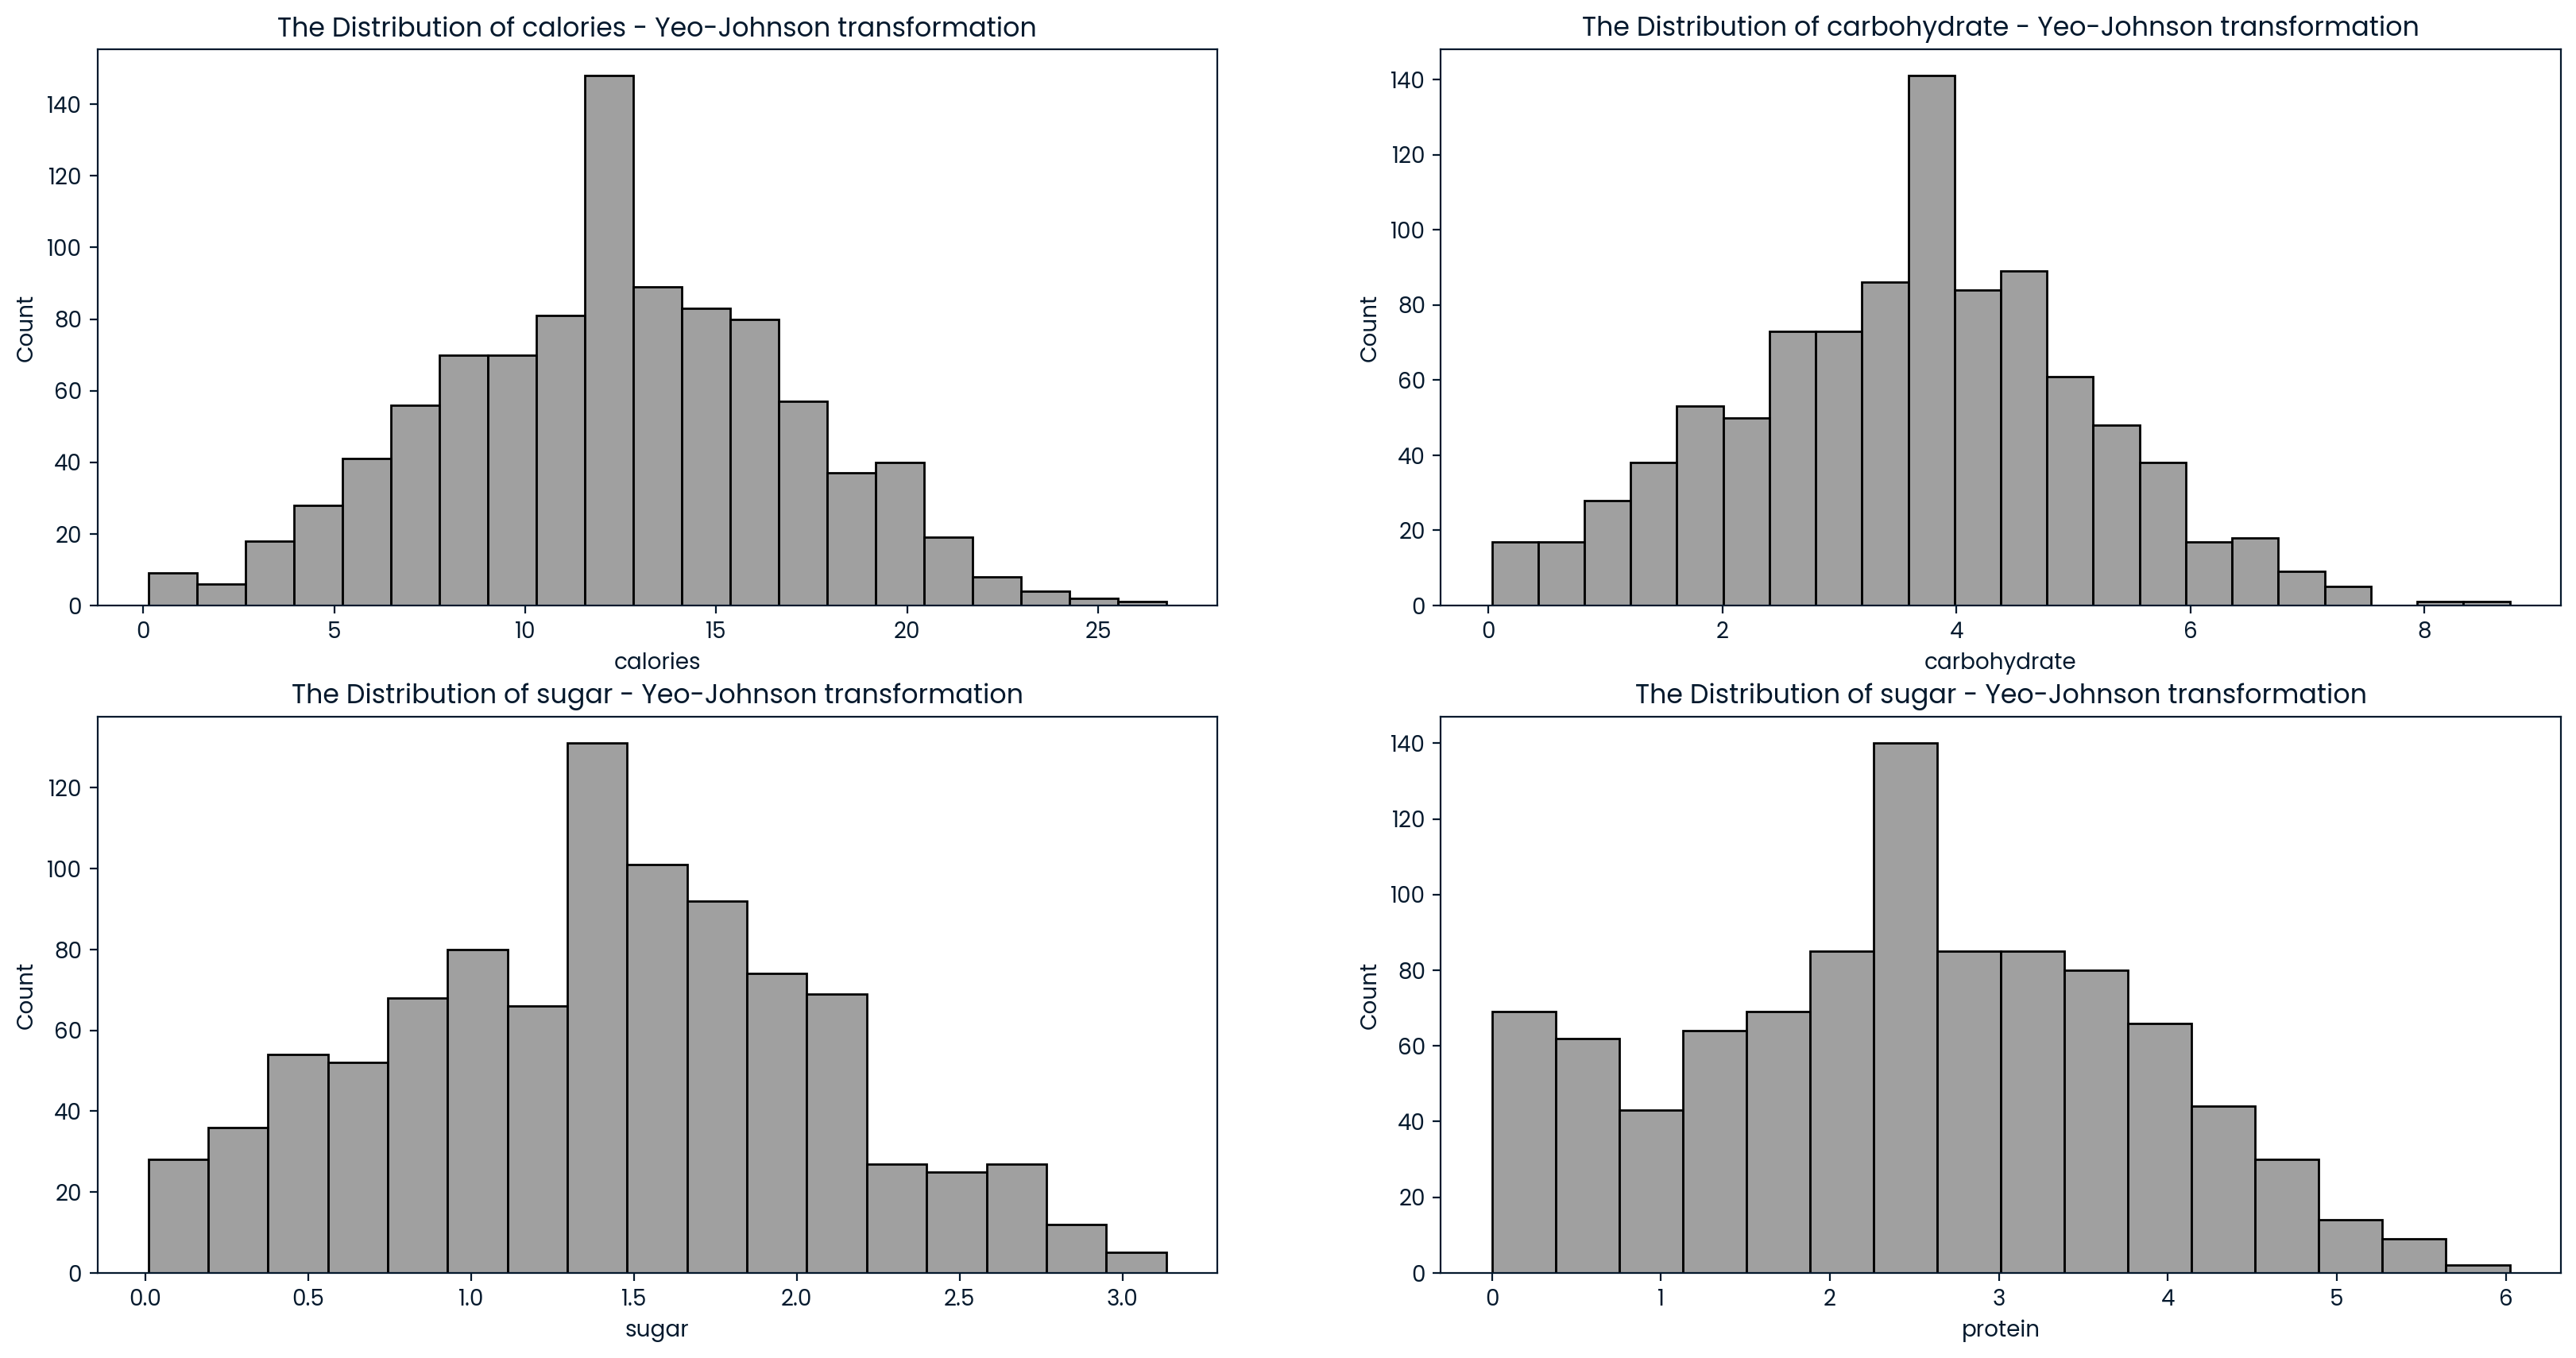

In [57]:
# We create four sub plot figures
fig, axes = plt.subplots(2,2,figsize=(20,10))

# We plot the histogram after apply the Yeo-Johnson transformation
sns.histplot(transformed_data['calories'], color='gray', ax=axes[0, 0]).set(title='The Distribution of calories - Yeo-Johnson transformation')
sns.histplot(transformed_data['carbohydrate'], color='gray', ax=axes[0, 1]).set(title='The Distribution of carbohydrate - Yeo-Johnson transformation')
sns.histplot(transformed_data['sugar'], color='gray', ax=axes[1, 0]).set(title='The Distribution of sugar - Yeo-Johnson transformation')
sns.histplot(transformed_data['protein'], color='gray', ax=axes[1, 1]).set(title='The Distribution of sugar - Yeo-Johnson transformation')

The distributions of calories, carbohydrates, sugar, and protein, after Yeo-Johnson transformation, display symmetrical, bell-shaped curves akin to normal distributions. Each variable's distribution is characterized by a distinct central peak, representing the mode, with most values concentrated around this peak. The values for each variable range from slightly above zero to a higher extreme, preserving the symmetry around the mean.

#### The count plot of category column

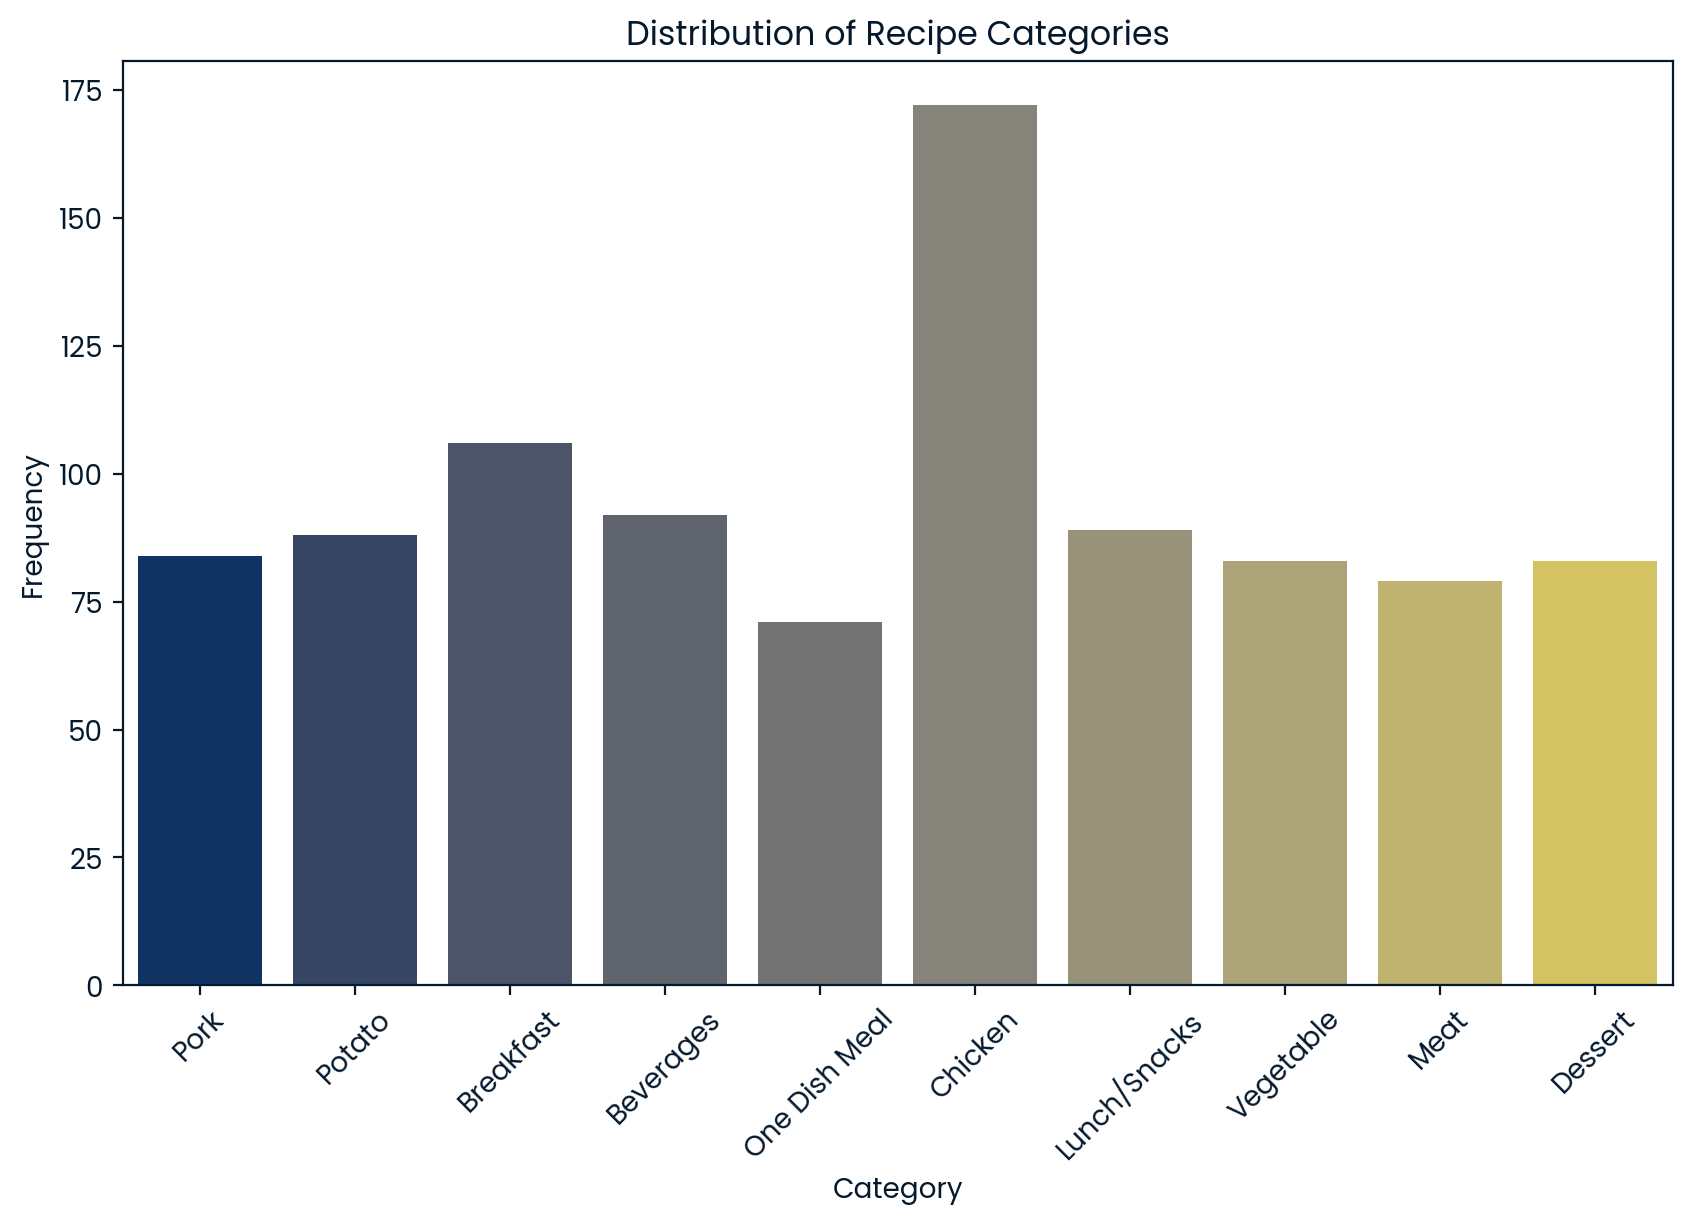

In [58]:
# Create a figure
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(x='category', data=data_visul, palette='cividis')
plt.title('Distribution of Recipe Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The above image is a bar chart illustrating the distribution of various recipe categories based on their frequency. The x-axis represents different recipe categories, while the y-axis shows the frequency of recipes within each category.

#### The violin plot of servings column

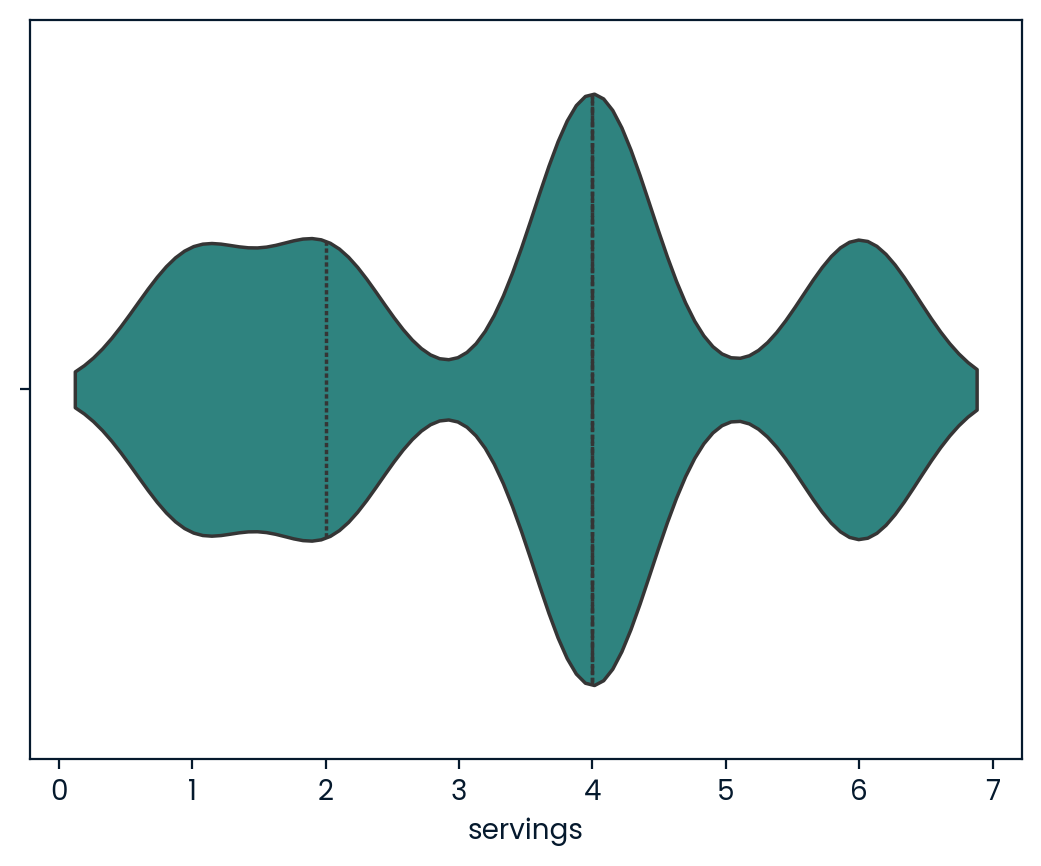

In [59]:
# Create the violin plot
sns.violinplot(x='servings', data=data_visul, inner='quartile', palette='viridis')

# Show plot
plt.show()

The above violin plot, which is symmetrical along the x-axis, displays a multimodal distribution with peaks at values 1, 2, 4 (the median and highest density point), and 6. This suggests the presence of distinct groupings within the servings data.

#### The Heatmap

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

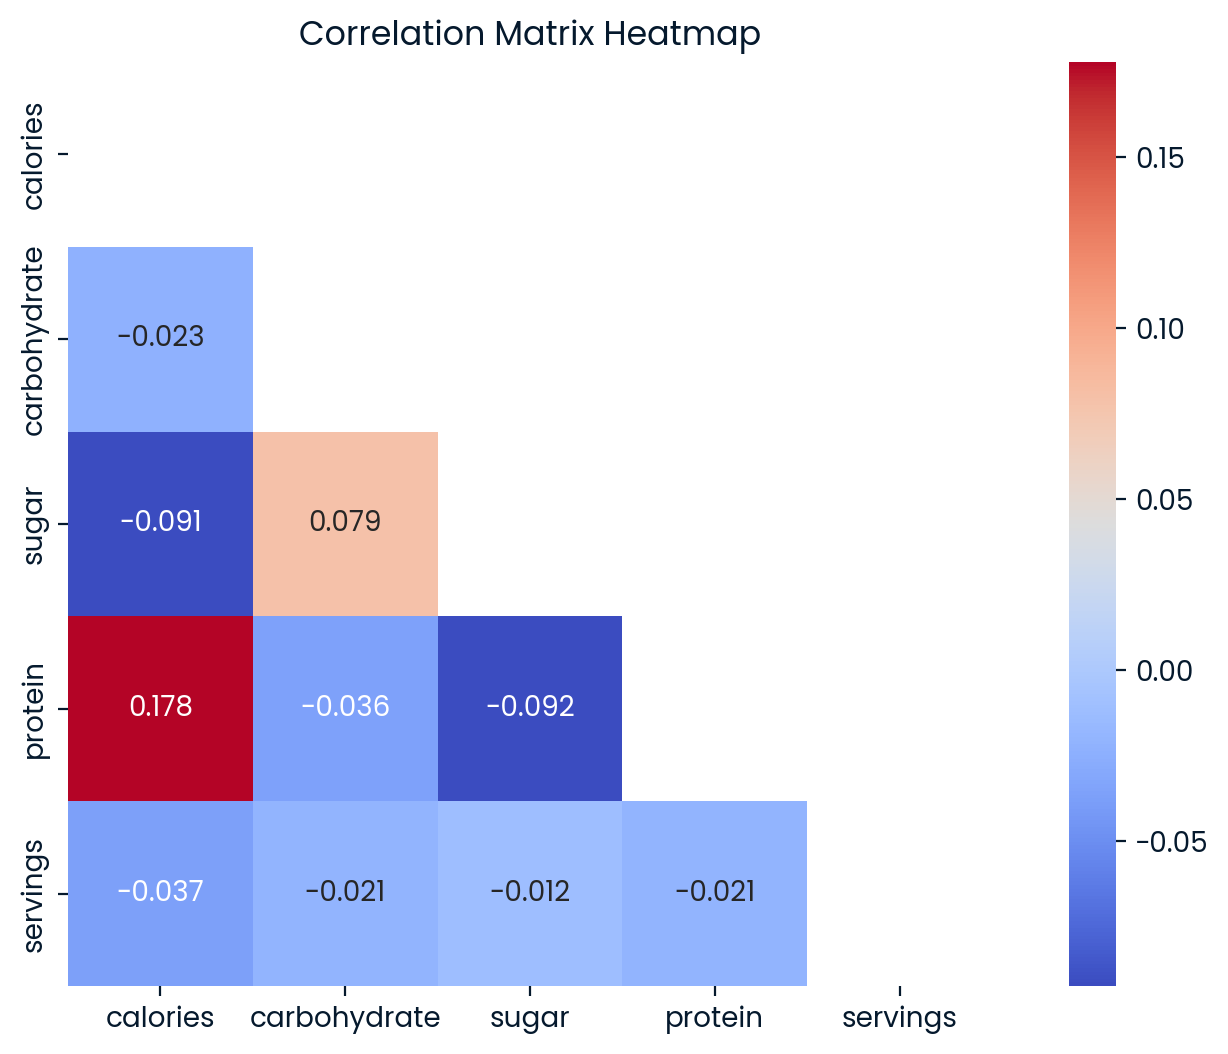

In [60]:
# Compute the correlation matrix
corr = data_visul.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ploting the heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.title('Correlation Matrix Heatmap')

The heatmap's color gradient ranges from dark blue (smaller values "negative") to dark red (larger values "positive"), with brighter colors indicating near-zero correlations. Most variable pairs show very weak correlations, with the strongest being a weak positive correlation between calories and protein (0.178). Negative correlations, such as calories with carbohydrate and sugar, and protein with sugar has also negative weak correlation. Overall, the heatmap indicates that the variables in the dataset have no strong linear dependencies.

#### The Pair plot

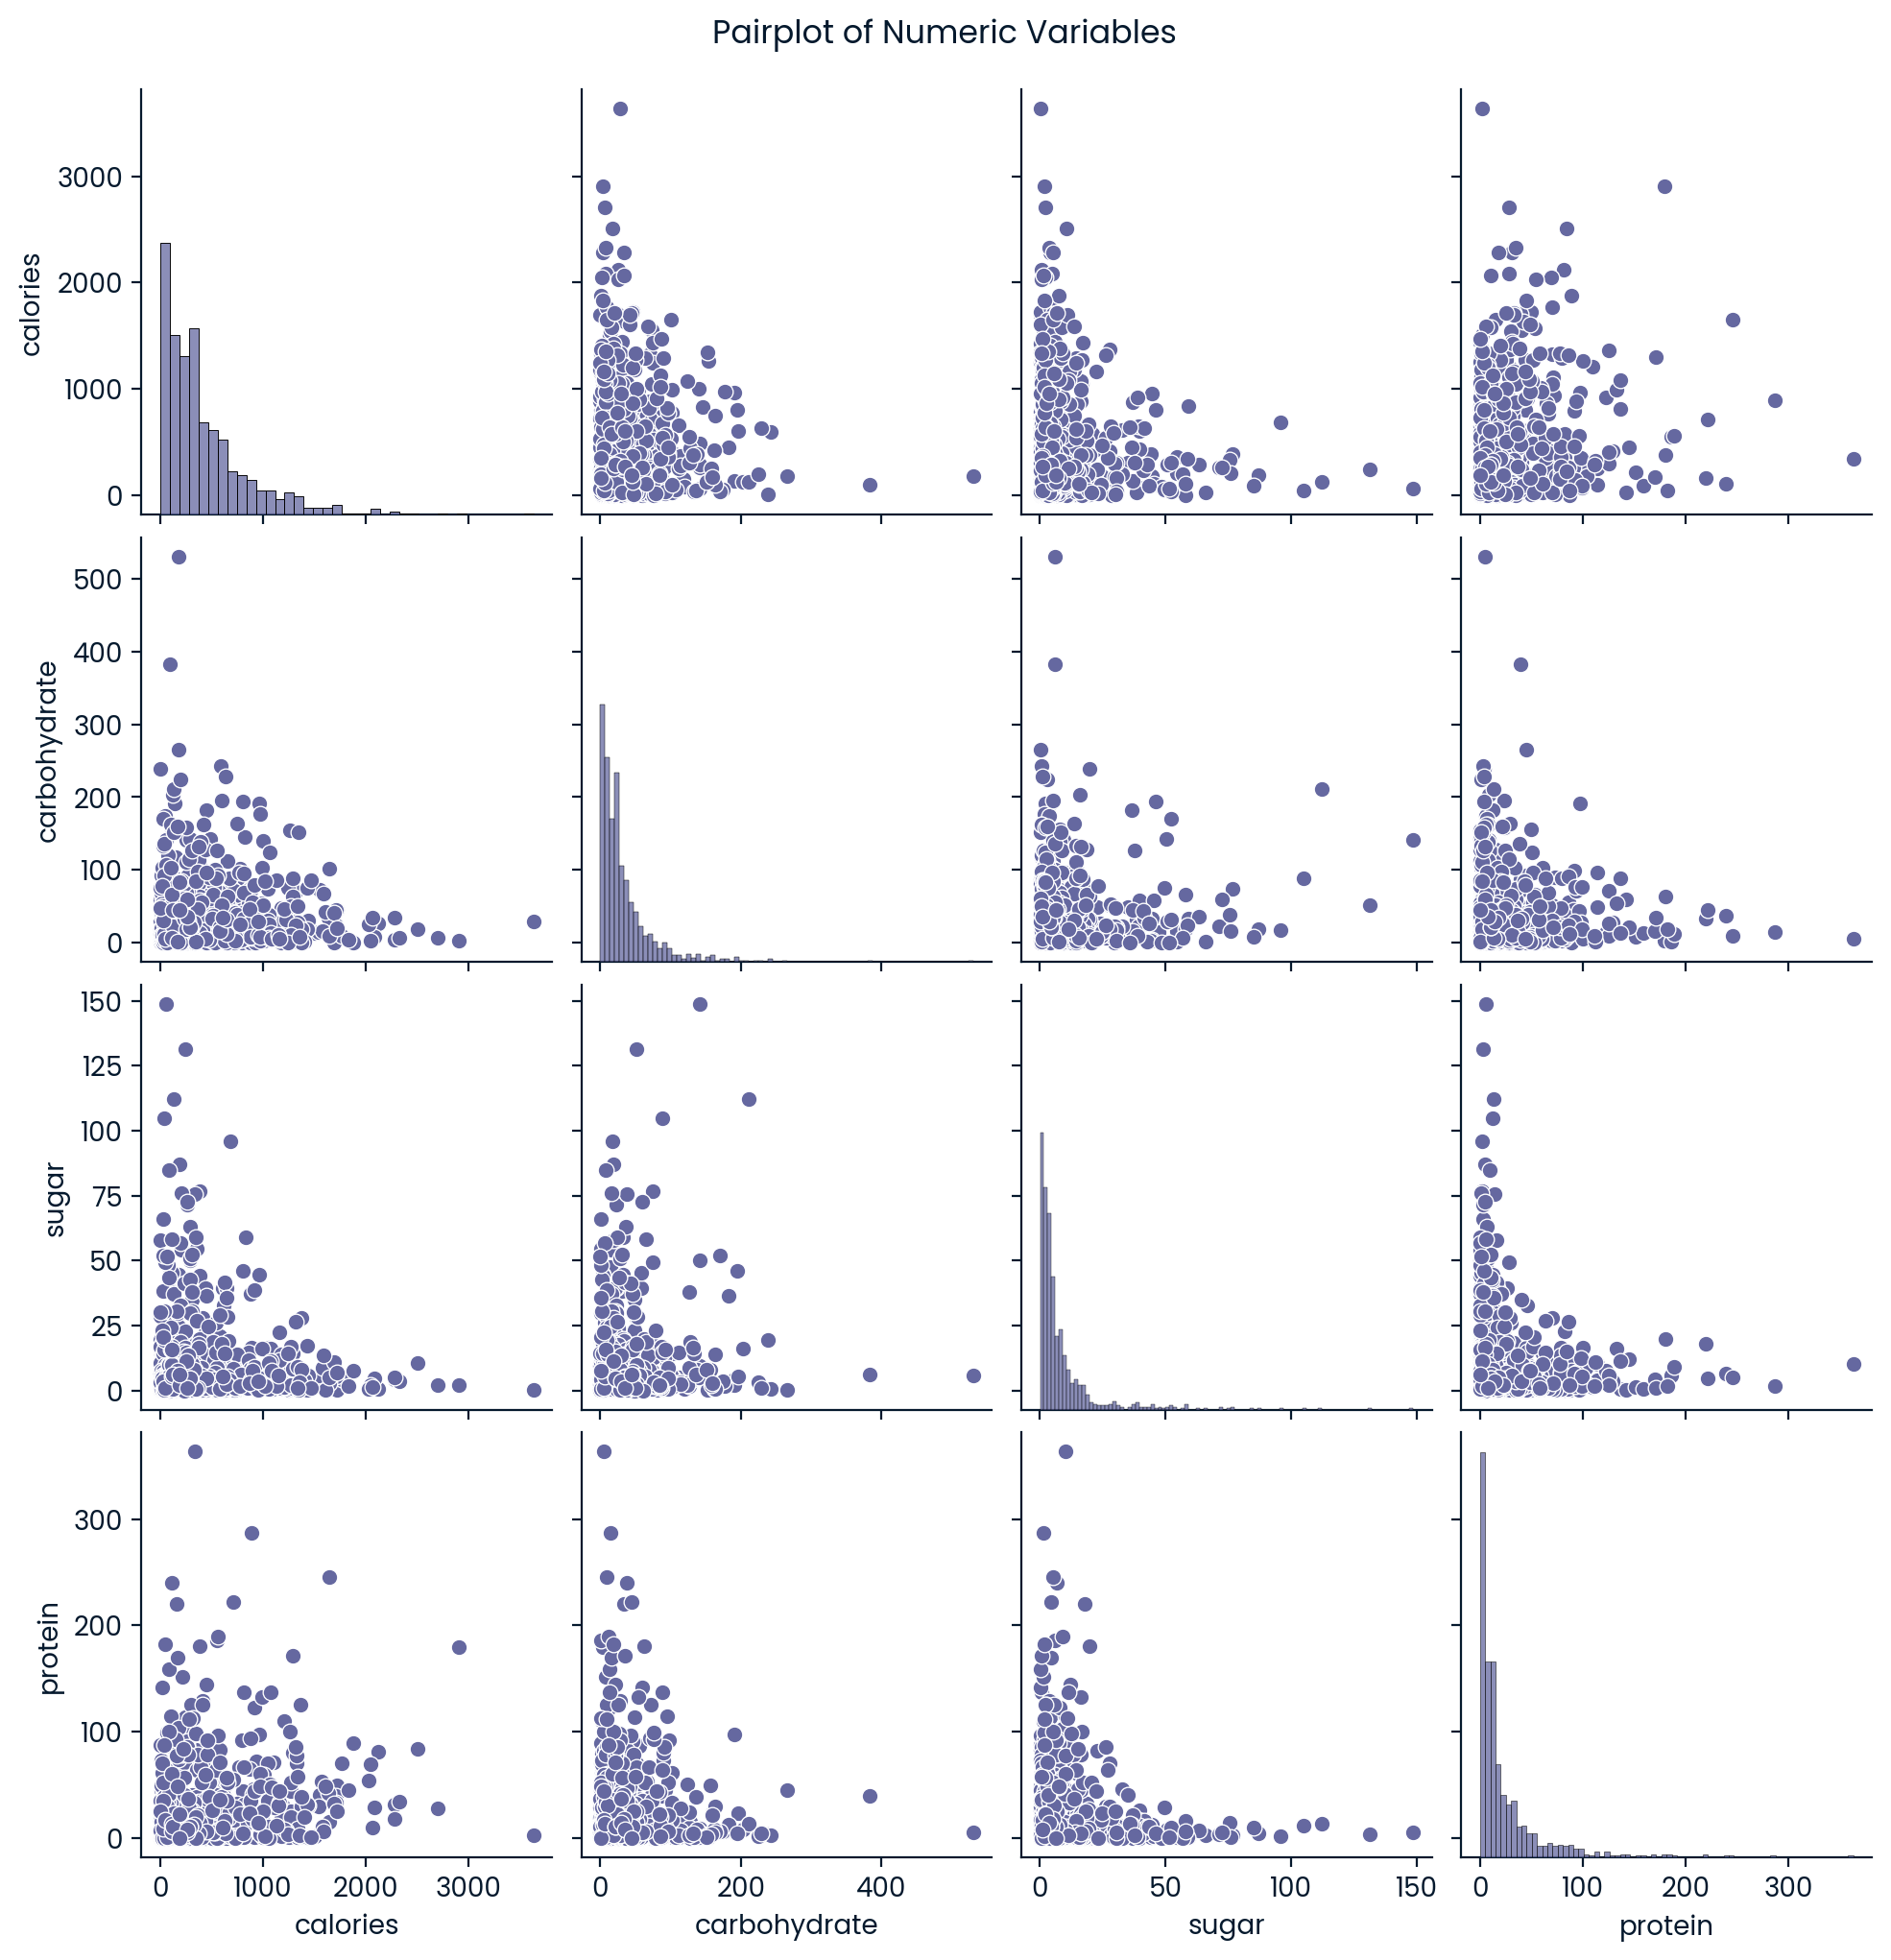

In [61]:
# Ploting the pair plot
sns.pairplot(data=data_visul[['calories', 'carbohydrate', 'sugar', 'protein']])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

The pair plot confirms that the distributions of calories, carbohydrates, sugar, and protein are right-skewed, with most values concentrated at the lower end. The histograms on the diagonal elements illustrate this pattern clearly. Scatter plots between variables show negative but weak relationships, with significant variability and a general clustering of lower values. Overall, the visualizations highlight weak correlations and significant skewness in the data distributions.

#### The Scatter Plot with Target and Servings

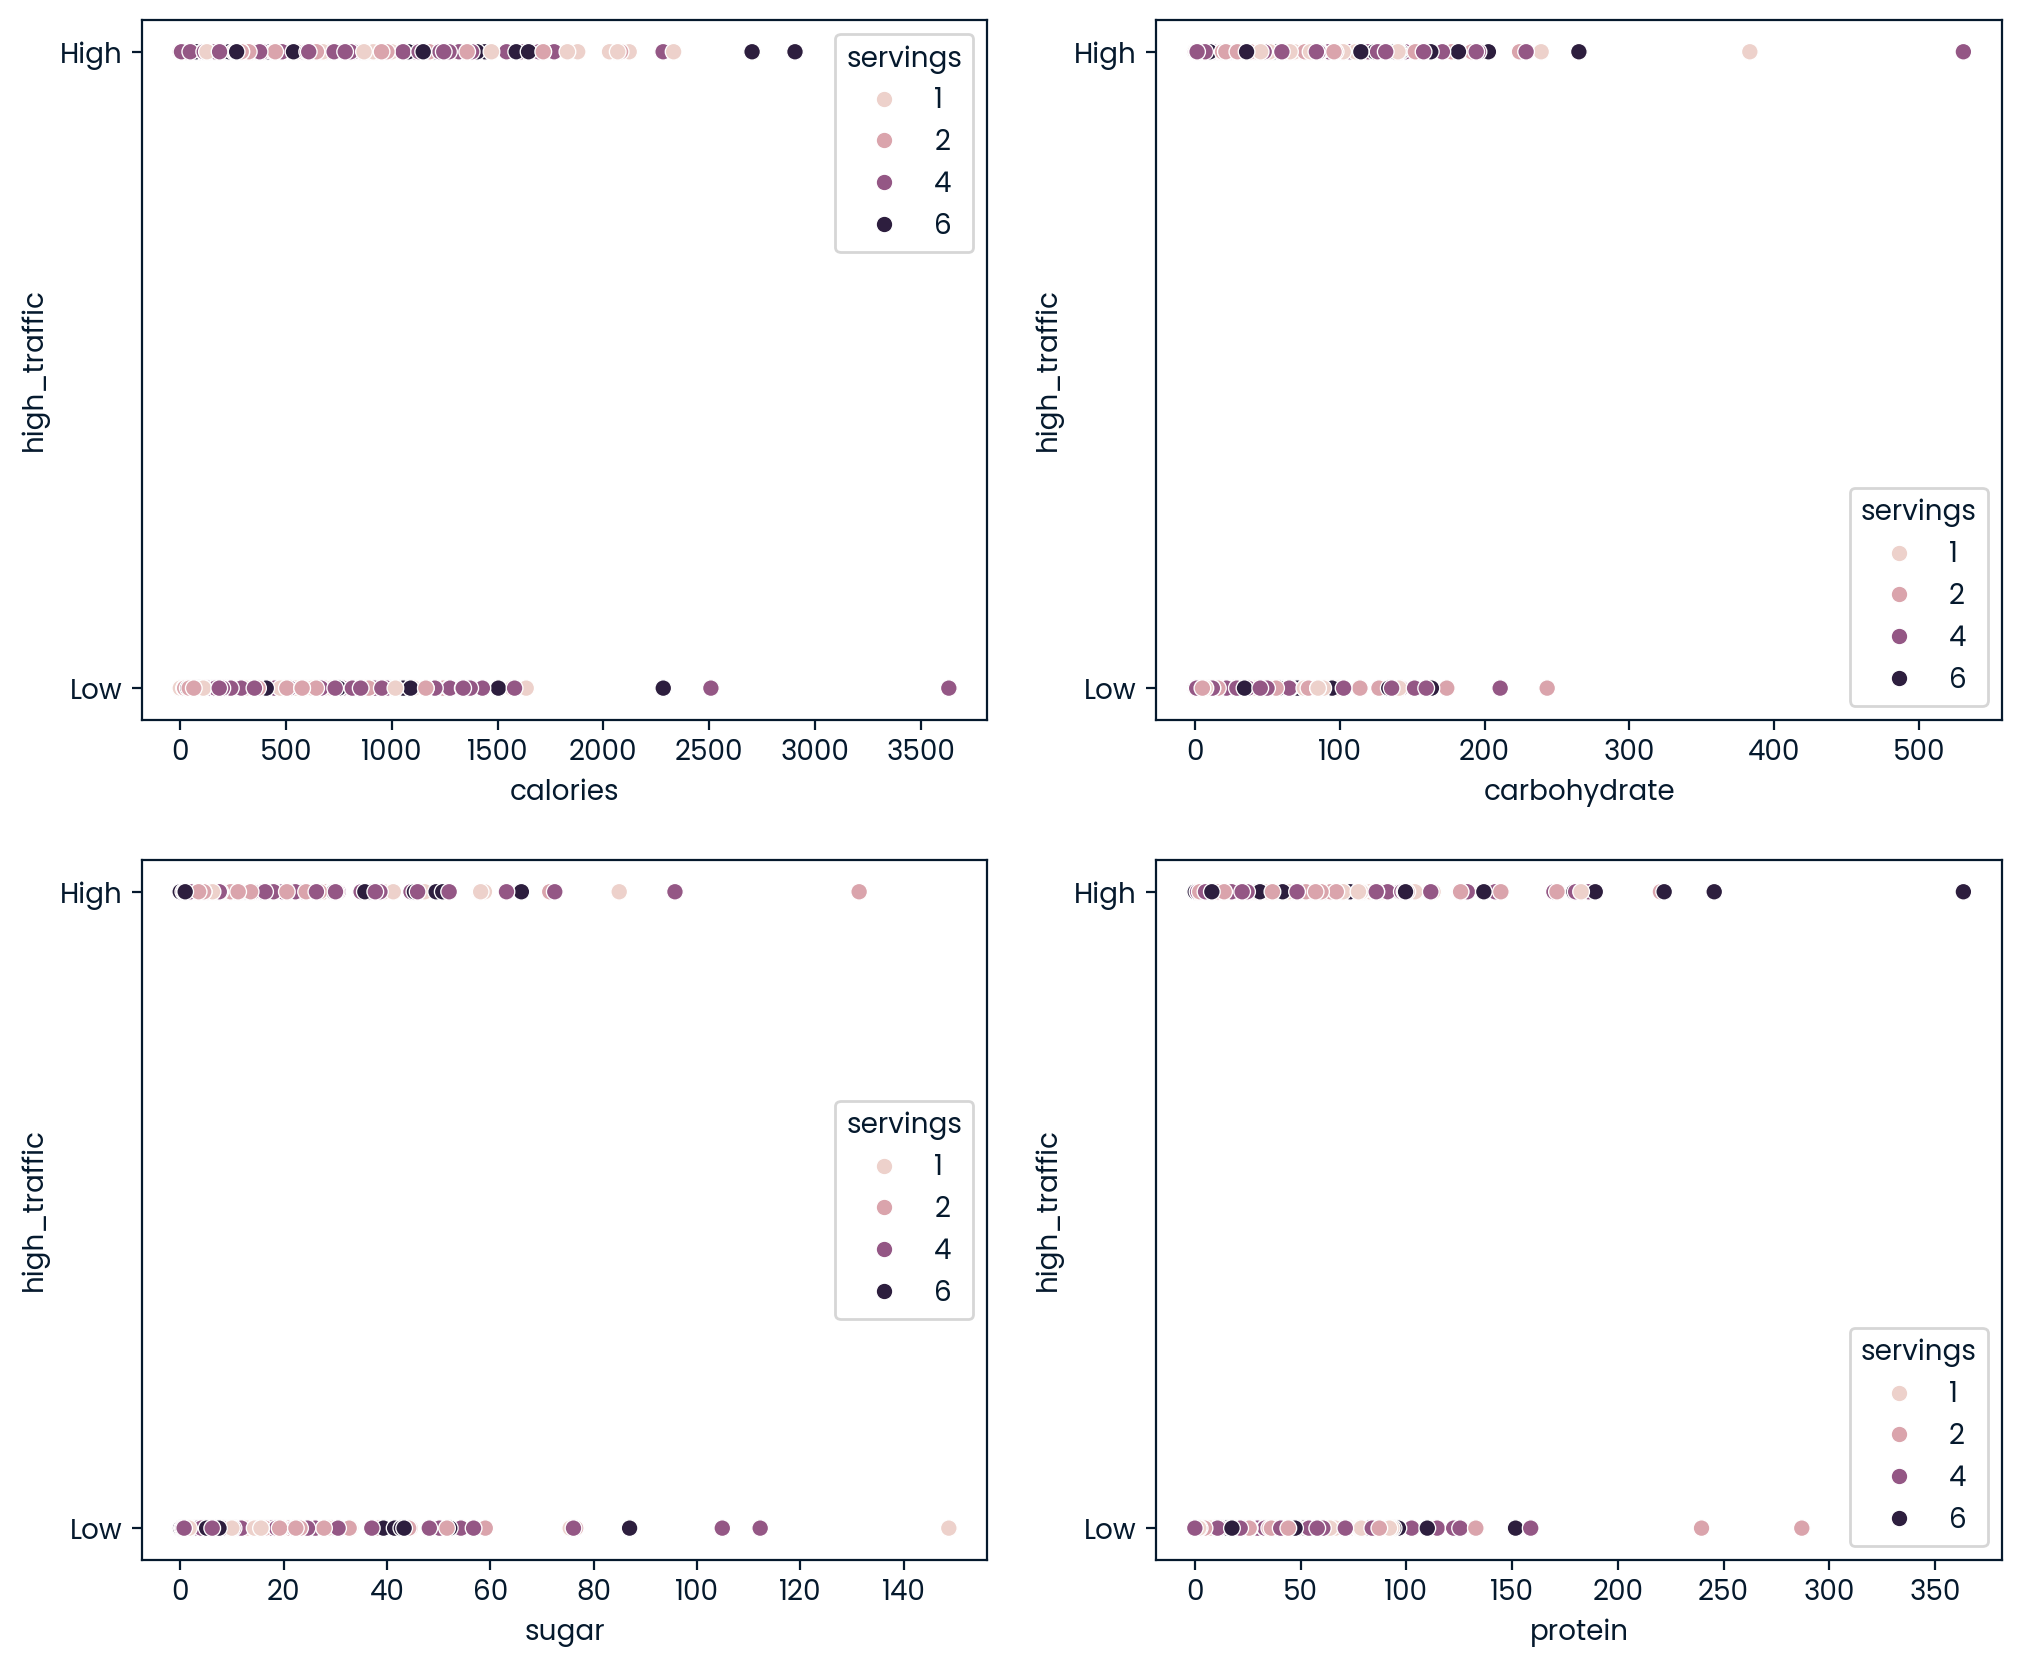

In [62]:
# Create four sub plot figures
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Ploting the scatter plot
sns.scatterplot(x='calories', y='high_traffic', hue='servings', data=data_visul, ax=ax[0, 0])
sns.scatterplot(x='carbohydrate', y='high_traffic', hue='servings', data=data_visul, ax=ax[0, 1])
sns.scatterplot(x='sugar', y='high_traffic', hue='servings', data=data_visul, ax=ax[1, 0])
sns.scatterplot(x='protein', y='high_traffic', hue='servings', data=data_visul, ax=ax[1, 1])

# Showing the plot
plt.show()

- **High Traffic Clusters**: Recipes with high traffic are mainly concentrated at lower values of calories, carbohydrates, sugar, and protein.
- **Outliers**: A few high-traffic recipes have very high nutritional values, but these are exceptions.
- **Servings**: There is no clear correlation between the number of servings and traffic levels, indicating serving size does not significantly impact recipe popularity.

# 4. Data Preprocessing

Here we perform data preprocessing by applying a PowerTransformer first to normalize specific features. Then we integrate these transformed features back into the dataset, replacing the original versions. 

We convert categorical values in the 'high_traffic' column from strings ('High' and 'Low') to binary values (1 and 0). 

Finally, we apply one-hot encoding to categorical variables, excluding the first category to avoid multicollinearity, and the processed data is prepared for further analysis or modeling.

In [63]:
# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Create the list of features to be transformed
trans_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']

# Fiting and transforming the data
data_transformed_arr = pt.fit_transform(data_prep[trans_features])

# Converting the transformed data back to a DataFrame
data_transformed_df = pd.DataFrame(data_transformed_arr, columns=trans_features)

In [64]:
# Drop the transformed features from the original dataset
data_temp = data_prep.drop(trans_features, axis=1)

# Concatenate the remaining original features with the transformed features
data_preprocessing = pd.concat([data_temp, data_transformed_df], axis=1)

In [65]:
# Replace occurrences of 'High' with 1 and 'Low' with 0 in the 'high_traffic' 
data_preprocessing['high_traffic'].replace('High',1, inplace=True)
data_preprocessing['high_traffic'].replace('Low',0, inplace=True)

In [66]:
# Convert categorical variables to dummy, and dropping the first level of each categorical variable to avoid multicollinearity
data_ready = pd.get_dummies(data_preprocessing, drop_first=True)

# Inspect the changes
data_ready.head()

,high_traffic,calories,carbohydrate,sugar,protein,servings,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,1,0.008015,0.035900,0.059373,0.024312,1.396020,0,0,0,0,0,0,1,0,0
1,1,-1.430212,0.567609,-1.412228,-1.378798,0.347088,0,0,0,0,0,0,0,1,0
2,0,1.190662,0.663945,-0.279199,-0.837309,-1.491245,1,0,0,0,0,0,0,0,0
3,1,-0.835249,0.351455,1.799078,-1.863355,0.347088,0,0,0,0,0,0,0,0,0
4,0,-1.565320,-1.670495,-1.301733,-1.552990,0.347088,0,0,0,0,0,0,0,0,0


# 5. Split the Data into Train and Test

We divide the data into features and target, and then split it into training and testing sets with an 80-20 split, ensuring class distribution is maintained through stratification and shuffling for randomness, with a fixed random state for reproducibility.

In [67]:
# Split the data into features and target
X = data_ready.drop(['high_traffic'], axis=1)
y = data_ready['high_traffic']

In [68]:
# Split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y, shuffle=True)

# 6. Model Fitting & Evaluation

It is clear that we deal with a classification problem, as the objective is to predict whether a recipe will lead to high traffic (a binary classification task). To address this problem, we will choose the below models:

- First, we train a baseline Logistic Regression model and evaluate its performance by predicting values on the test set, calculating accuracy, and generating a confusion matrix and classification report. 
- Then we apply an XGBoost Classifier using parameters optimized via GridSearchCV, train the model, and similarly evaluate it on the test set. 

### 6.1 Baseline Model - Logistic Regression:

In [69]:
# Initialize and fit the Logistic Regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)

# Predict the target values for the test set and calculate the accuracy of the model
y_pred = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix and a classification report
lg_matrix = confusion_matrix(y_test, y_pred)
lg_report = classification_report(y_test, y_pred)

# Print the accuracy of the model, confusion matrix, and the classification report
print(f"\n{'='*20}\nLOGISTIC REGRESSION MODEL ACCURACY\n{'='*20}\n")
print(f"Accuracy: {lg_accuracy:.2f}\n")

print(f"{'='*20}\nCONFUSION MATRIX\n{'='*20}\n")
print(f"{lg_matrix}\n")

print(f"{'='*20}\nCLASSIFICATION REPORT\n{'='*20}\n")
print(lg_report)


LOGISTIC REGRESSION MODEL ACCURACY

Accuracy: 0.84

CONFUSION MATRIX

[[61 14]
 [16 99]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        75
           1       0.88      0.86      0.87       115

    accuracy                           0.84       190
   macro avg       0.83      0.84      0.84       190
weighted avg       0.84      0.84      0.84       190



### 6.2 Comparison Model - XGBClassifier:

In [70]:
# We Knew the best parameters by applying GridSearchCV, see the appendix.
best_params = {
    'colsample_bytree': 0.5, 
    'gamma': 0, 
    'learning_rate': 0.01, 
    'max_depth': 3, 
    'n_estimators': 300, 
    'reg_alpha': 0, 
    'reg_lambda': 0.5, 
    'subsample': 1.0
}

# Define XGBoost Classifier model and use the best parameters
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

# Print the accuracy of the model, confusion matrix, and the classification report
print(f"\n{'='*20}\nXGBCLASSIFIER MODEL ACCURACY\n{'='*20}\n")
print(f"Accuracy: {xgb_accuracy:.2f}\n")

print(f"{'='*20}\nXGBCLASSIFIER MODEL CONFUSION MATRIX\n{'='*20}\n")
print(f"{xgb_matrix}\n")

print(f"{'='*20}\nXGBCLASSIFIER MODEL CLASSIFICATION REPORT\n{'='*20}\n")
print(xgb_report)


XGBCLASSIFIER MODEL ACCURACY

Accuracy: 0.79

XGBCLASSIFIER MODEL CONFUSION MATRIX

[[54 21]
 [18 97]]

XGBCLASSIFIER MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        75
           1       0.82      0.84      0.83       115

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190



# 7. Results:

- Based on the comparison of the two models, both models performed reasonably well in predicting high-traffic recipes. However, given a KPI __accuracy__ of not less than 80%, the __Logistic Regression__ has achieved the targeted KPI by scoring an accuracy of 84%. The __XGBClassifier__ model attained an accuracy of 79%, but this may increase if we do more investigation and feature engineering. 
- The confusion matrices reveal that the __Logistic Regression__ model had better performance in terms of __true positives__ and __true negative__ compared to the __XGBClassifier__ model. 
- In the Classification Report, the __Logistic Regression__ again outperforms __XGBClassifier__ in all metrics for both classes (Low and High). It has higher precision, recall, and F1-score.

# 8. Recommendation:

Based on the results, we recommend the following:
- While __Logistic Regression__ has surpassed the target and scored an accuracy of 84%, it is essential to continuously refine both models.  
- __Feature Engineering__: Explore additional features or transformations to enhance the models' predictive capabilities and capture more nuanced patterns in the data.
- Implement structured __A/B testing__ methodologies to validate model predictions in real-world scenarios. Conducting rigorous testing can ensure the reliability of the models' accuracy and verify their effectiveness in predicting popular recipes consistently above 80%.

# 9. Conclusion:

In conclusion, both the Logistic Regression and XGBoost models have shown robust performance in predicting recipe popularity. Considering the overall objectives and model performances, __Logistic Regression__ remains the preferable choice due to its higher accuracy and potential impact on driving traffic and engagement. By implementing the recommendations, Tasty Bytes can optimize website traffic and potentially increase subscriptions based on the predicted popularity of recipes. Continuing to monitor and refine these models will be crucial for ensuring ongoing success in selecting appealing recipes for visitors.

# 10. Appendix:

### 10.1 The Data is Missing Not At Random (MNAR):
As we can see in the below figure there is a systematic missing in the data. The missing values are not occurring randomly, but rather follow a discernible pattern or mechanism.

Dealing with systematic missingness requires understanding the underlying pattern or mechanism causing the missing values. 
we applied Imputation Techniques to handle this issue.

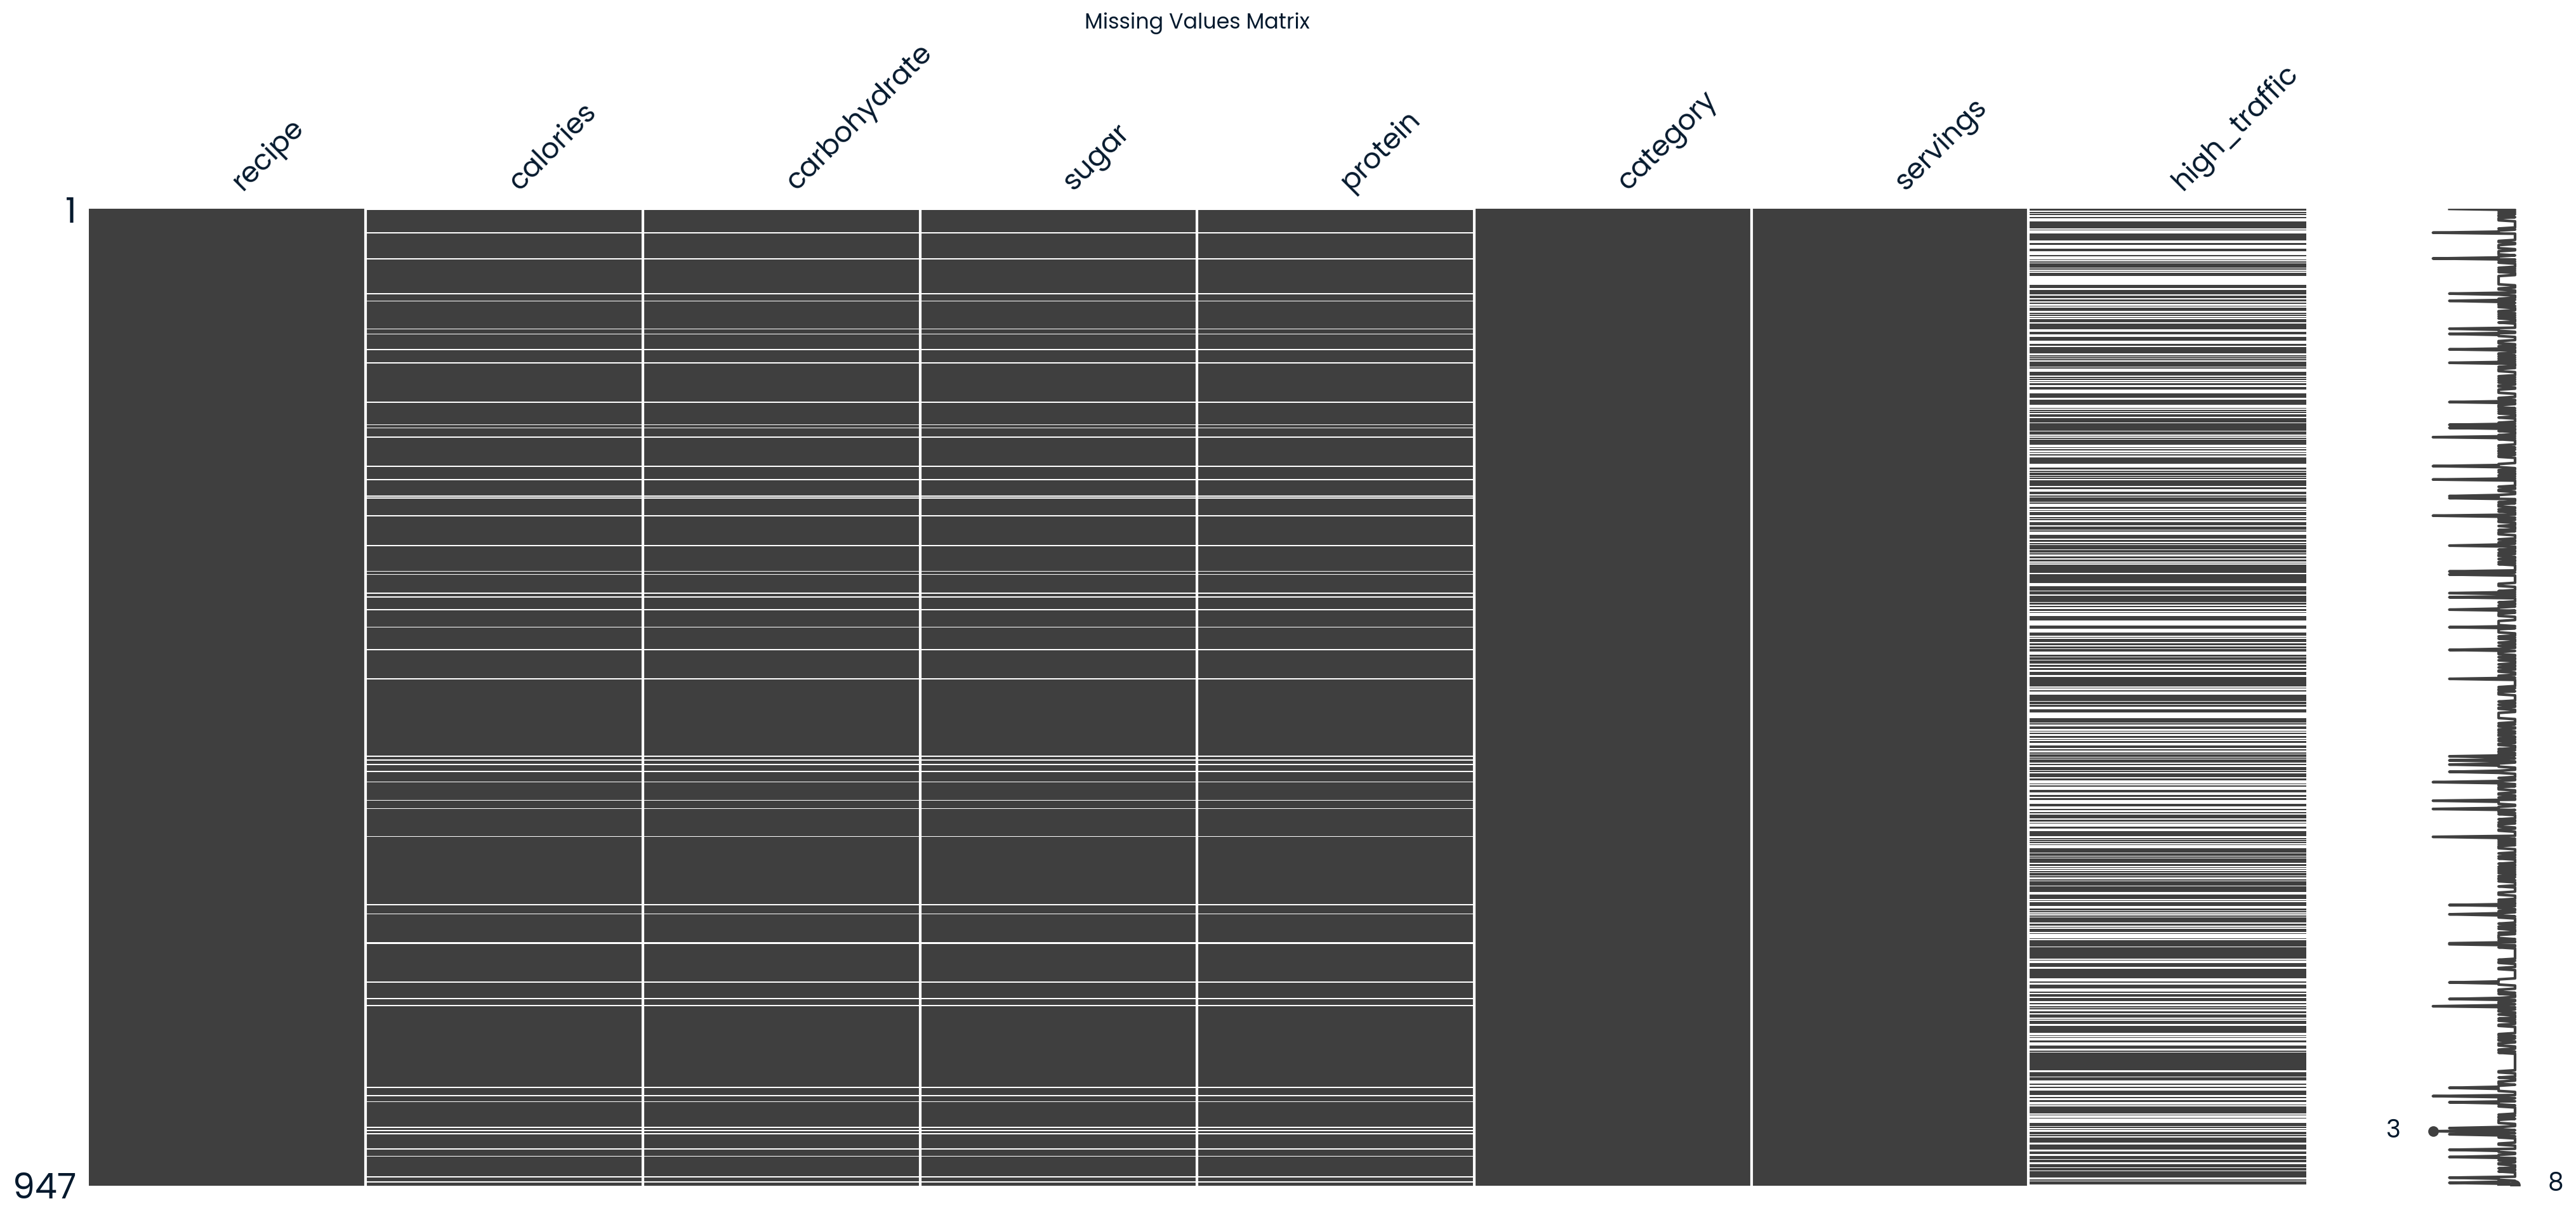

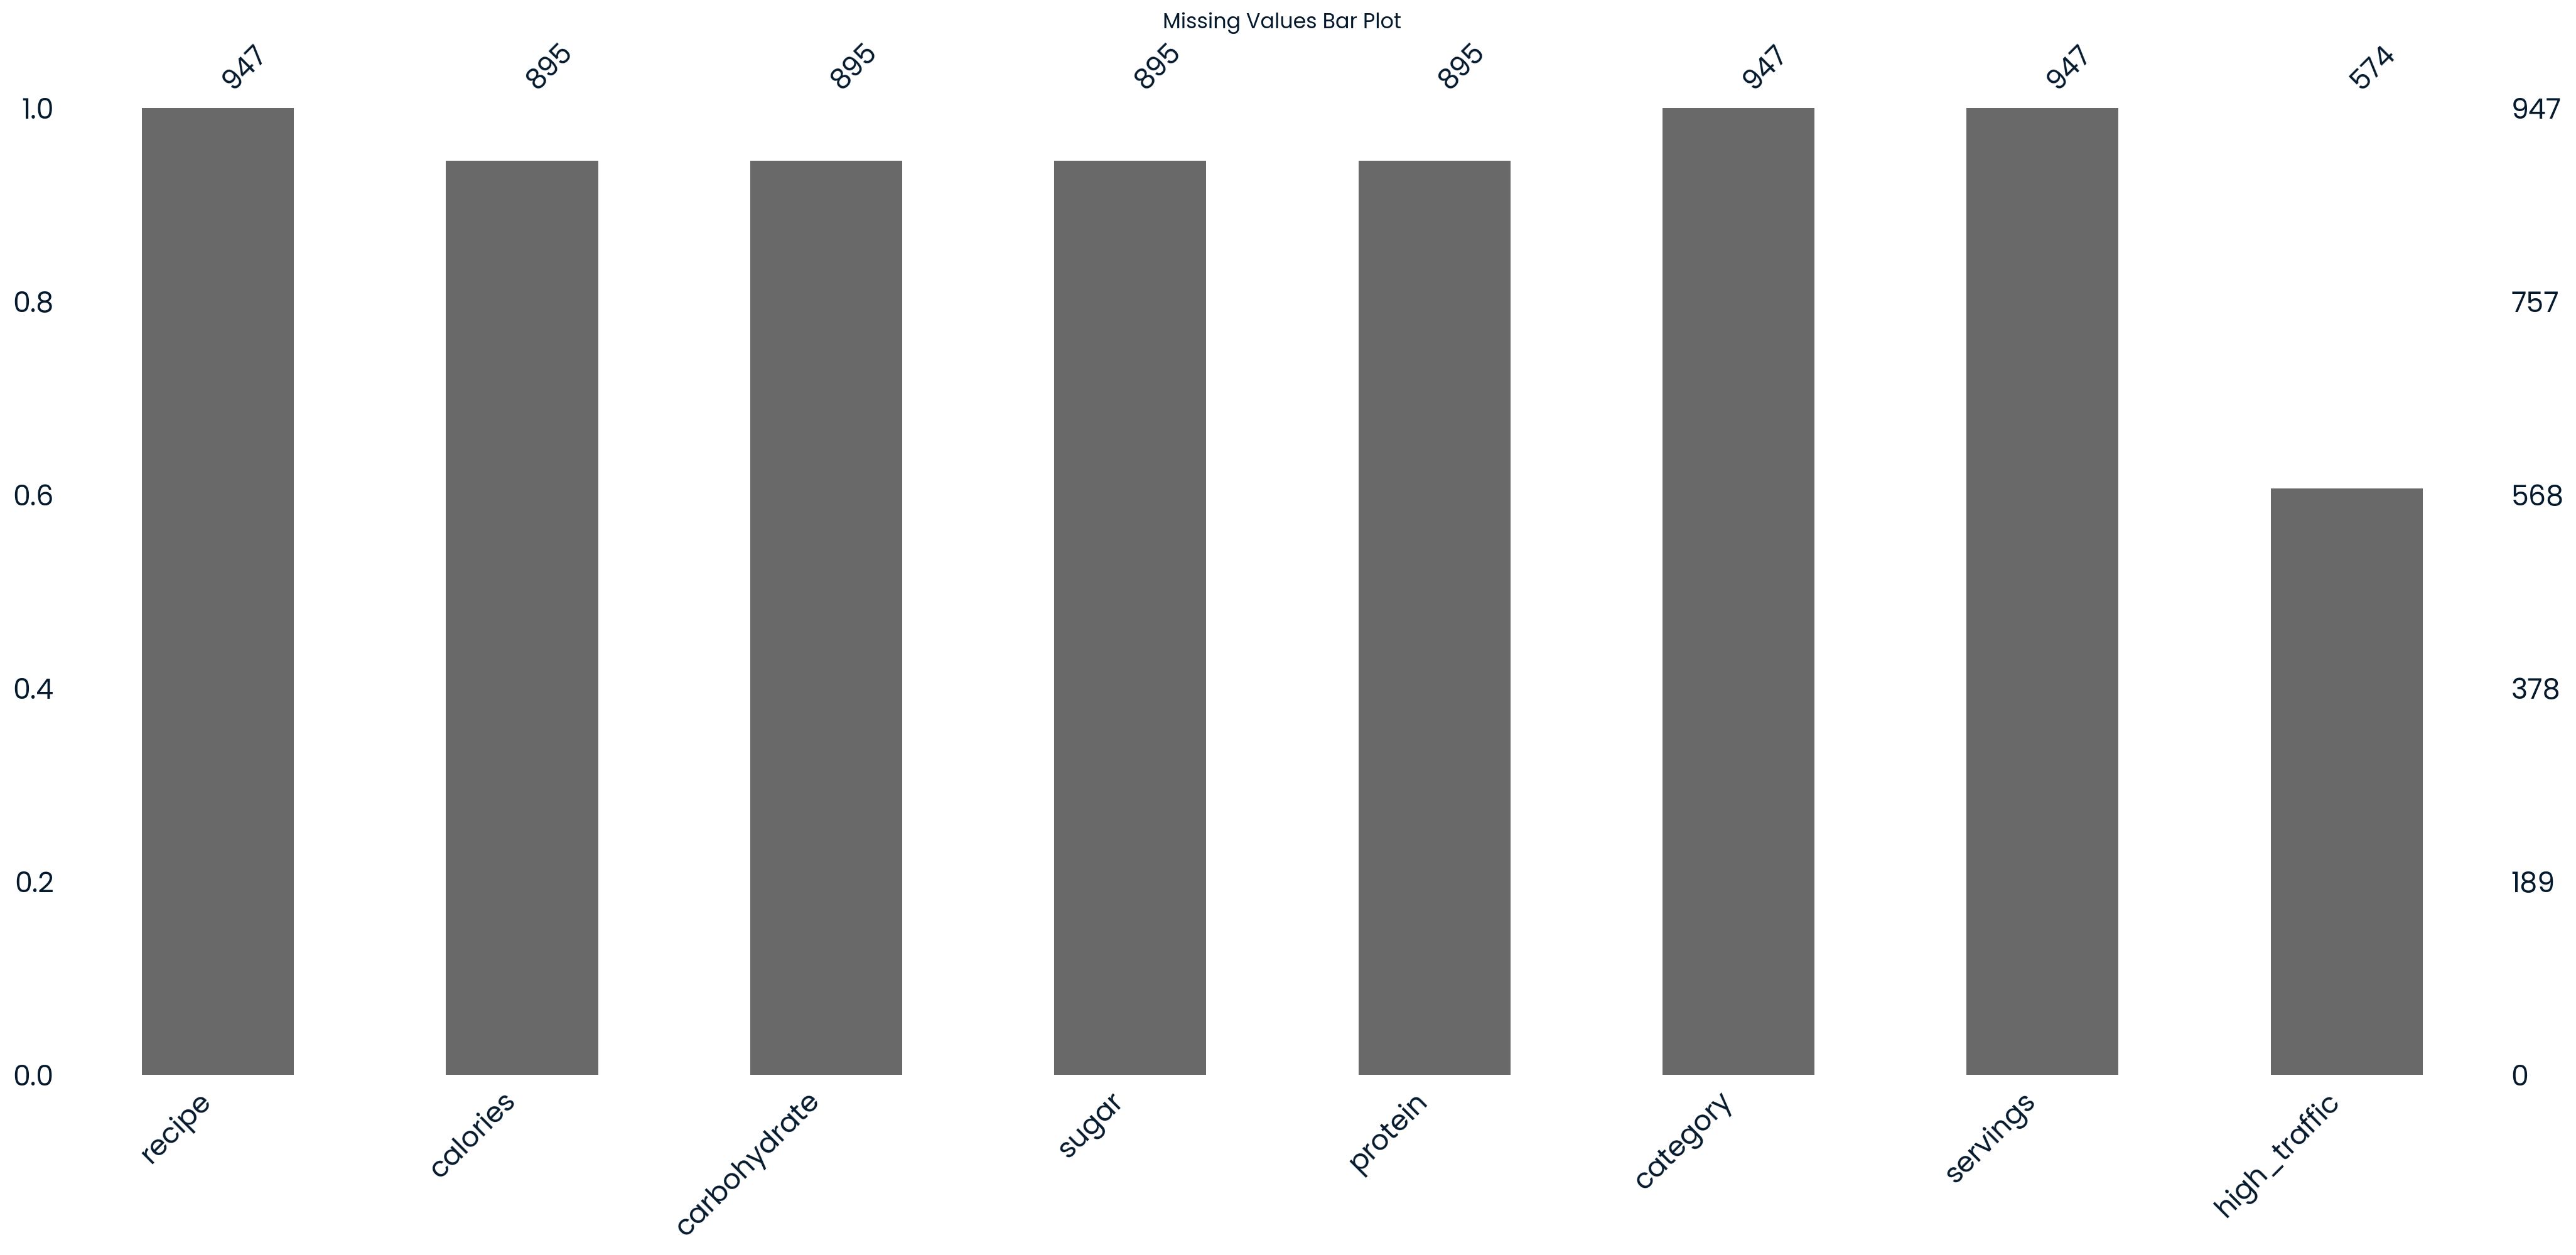

In [71]:
# Import missingno
import missingno as msno

# Plot missingness matrix
msno.matrix(data)
plt.title('Missing Values Matrix')
plt.show()

# Plot missingness bar
msno.bar(data)
plt.title('Missing Values Bar Plot')
plt.show()

### 10.2 Grid Search CV:
Here we are optimizing an XGBoost classifier through GridSearchCV to find the best hyperparameters for the model. The grid search is conducted by exploring various hyperparameter combinations like learning rate, maximum depth, number of estimators, subsample ratio, etc. These parameters are utilized to train the final XGBoost model. The model is evaluated on the test set. Furthermore, the feature importances are calculated and displayed, showcasing the importance of each feature in the XGBoost model's predictive performance.

In [72]:
# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01], # We only put the best learning_rate to reduce the number of fitted candidates.
    'max_depth': [3], # We only put the best max_depth to reduce the number of fitted candidates.
    'n_estimators': [300, 400], 
    'subsample': [1], # We only put the best subsample here to reduce the number of fitted candidates.
    'colsample_bytree': [0.5], # We only put the best colsample_bytree here to reduce the number of fitted candidates.
    'gamma': [0.0], # We only put the best gamma here to reduce the number of fitted candidates.
    'reg_alpha': [0, 0.5], 
    'reg_lambda': [0.5] # We only put the best reg_lambda here to reduce the number of fitted candidates.
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
# Remove the comment markers from the following code to execute the grid search model.
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0.0],
                         'learning_rate': [0.01], 'max_depth': [3],
                         'n_estimators': [300, 400], 'reg_alpha': [0, 0.5],
                         'reg_lambda': [0.5], 'subsample': [1]},
             scoring='accuracy', verbose=2)

In [73]:
# Get the best parameters and the best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"\n{'='*20}\nBEST PARAMETERS AND SCORE\n{'='*20}\n")
print(f"Best Parameters: {best_params}\n")
print(f"Best Score: {best_score:.2f}\n")

# Use the best parameters to train the final XGBoost model
final_xgb_model = XGBClassifier(**best_params)
final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = final_xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

# Print the accuracy of the model
print(f"\n{'='*20}\nXGBCLASSIFIER MODEL ACCURACY\n{'='*20}\n")
print(f"Accuracy: {xgb_accuracy:.2f}\n")

# Print the confusion matrix
print(f"\n{'='*20}\nXGBCLASSIFIER MODEL CONFUSION MATRIX\n{'='*20}\n")
print(xgb_matrix)

# Print the classification report
print(f"\n{'='*20}\nXGBCLASSIFIER MODEL CLASSIFICATION REPORT\n{'='*20}\n")
print(xgb_report)


BEST PARAMETERS AND SCORE

Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 1}

Best Score: 0.70


XGBCLASSIFIER MODEL ACCURACY

Accuracy: 0.79


XGBCLASSIFIER MODEL CONFUSION MATRIX

[[54 21]
 [18 97]]

XGBCLASSIFIER MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        75
           1       0.82      0.84      0.83       115

    accuracy                           0.79       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.79      0.79       190



In [74]:
# Get feature importances from the final XGBoost model
feature_importances = final_xgb_model.feature_importances_

# Zip feature names and importances
importances_zip = zip(X_train.columns, feature_importances)

# Sort the zipped list based on importances
sorted_importances = sorted(importances_zip, key=lambda x: x[1], reverse=True)

# Print sorted feature importances with improved styling
print(f"\n{'='*20}\nFEATURE IMPORTANCES\n{'='*20}\n")
for feature_name, importance in sorted_importances:
    print(f"Feature: {feature_name:<30} Importance: {importance:.4f}")


FEATURE IMPORTANCES

Feature: category_Vegetable             Importance: 0.1636
Feature: category_Potato                Importance: 0.1456
Feature: category_Pork                  Importance: 0.1153
Feature: category_Breakfast             Importance: 0.1047
Feature: category_Chicken               Importance: 0.0956
Feature: protein                        Importance: 0.0909
Feature: category_Meat                  Importance: 0.0589
Feature: category_Lunch/Snacks          Importance: 0.0526
Feature: category_One Dish Meal         Importance: 0.0385
Feature: calories                       Importance: 0.0350
Feature: category_Dessert               Importance: 0.0330
Feature: carbohydrate                   Importance: 0.0298
Feature: servings                       Importance: 0.0183
Feature: sugar                          Importance: 0.0181


### Thank you for your time

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation